In this notebook, I use a new acquisition function, expected constrained improvement acquisition function. http://proceedings.mlr.press/v32/gardner14.pdf

To solve the problem 
<center>$min_{c(x) > l}f(x),$<center>
    
f(x) is the total supply chain cost, c(x) is the survice level constraint, I build two gaussian processes c(x) and f(x). 

I chance the range of the survice level. for 0.8 survice level, c(x) is
    <center> totalDemand * 0.2 - totalLateSales > 0
    

In [1]:
from gp_constraint_min import BayeOpt
from objective_function import objective_function, objective_function_products,print_result
from skopt import gp_minimize
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import ConstantKernel, Matern,RBF


import numpy as np
import random

def f_product(x):
    res = objective_function_products(x, days = 300, plotdata = False, return_SL = False)
    return res#logit(res)
def f_cost(x):
    res = objective_function(x, days = 300, plotdata = False, return_SL = False)
    return res
def initial_points(bounds, nums):
    random.seed(0)
    X_init = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(nums, bounds.shape[0]))
    return X_init
bounds = np.array([[100,400] for _ in range(12)])
X_init = initial_points(bounds, 20)



In [2]:

m52_1 = ConstantKernel(1) * RBF(np.array([0.5]*12))
gpr1 = GaussianProcessRegressor(kernel=m52_1, alpha=10, noise = "gaussian")

m52_2 = ConstantKernel(1) * RBF(1)
gpr2 = GaussianProcessRegressor(kernel=m52_2, alpha=10)#, noise = "gaussian")






In [3]:
A = BayeOpt(obj_func = f_cost,
             constraint_func = f_product,
             constraint_value = 0,
             bounds = bounds, 
             gpr_obj = gpr1,
             gpr_constraint = gpr2,
             init_x = X_init, 
             niter = 80,
             n_restarts = 25)

(20, 1) [[13283779.66607079]
 [12975209.45193283]
 [12869845.55538274]
 [13755400.12033615]
 [11817575.90110749]
 [13251769.36196896]
 [13473066.38686634]
 [13835131.21302316]
 [13276416.53021358]
 [13951739.80356067]
 [12950629.16423446]
 [12056510.10145653]
 [13039627.84438256]
 [13023888.61063518]
 [13159172.08122324]
 [12905788.23867321]
 [13962160.5214286 ]
 [13893040.04472116]
 [13749151.73739796]
 [12307455.82480671]]
(20, 1) [[-8362.78188924]
 [   51.8       ]
 [-1275.82587422]
 [-7053.4385326 ]
 [-8881.19970194]
 [-4096.32913583]
 [-4209.11214955]
 [-8824.46075701]
 [-8432.4991226 ]
 [-1382.14802828]
 [   58.8       ]
 [-8337.17204407]
 [-2783.70554562]
 [-9028.36032625]
 [-8830.24117441]
 [-7769.62366533]
 [-8484.31226649]
 [-8965.64125489]
 [-8681.55182326]
 [-8619.05448576]]


In [4]:
A.bay_opt()

(array([12950629.16423446]),
 array([170.73619059, 293.60711983, 334.24773303, 224.88834715,
        162.66350241, 303.23557379, 293.48956314, 103.68336342,
        233.68330522, 295.33987768, 237.93595655, 339.65077538]))

In [17]:
A.gpr_constraint.kernel_.k1.get_params()

{'k1': 316**2,
 'k2': RBF(length_scale=[439, 513, 842, 1.38e+03, 6.08e+04, 557, 3.29e+04, 493, 5.27e+04, 435, 7.74e+04, 112]),
 'k1__constant_value': 100000.00000000001,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': array([  439.37124317,   512.75131907,   842.00027895,  1376.11549603,
        60757.47254071,   556.65649028, 32932.27674146,   492.8013191 ,
        52719.34411802,   434.5032361 , 77368.68946501,   111.6900908 ]),
 'k2__length_scale_bounds': (1e-05, 100000.0)}

In [18]:
A.gpr_obj.kernel_.k1.get_params()

{'k1': 316**2,
 'k2': RBF(length_scale=[1.2e+03, 979, 1e+05, 1e+05, 1e+05, 1e+05, 1e+05, 1e+05, 1e+05, 835, 1e+05, 1e+05]),
 'k1__constant_value': 100000.00000000001,
 'k1__constant_value_bounds': (1e-05, 100000.0),
 'k2__length_scale': array([  1197.22855039,    979.21308479, 100000.        , 100000.        ,
        100000.        , 100000.        , 100000.        , 100000.        ,
        100000.        ,    834.80541413, 100000.        , 100000.        ]),
 'k2__length_scale_bounds': (1e-05, 100000.0)}

all cost is:  12933259.83940666


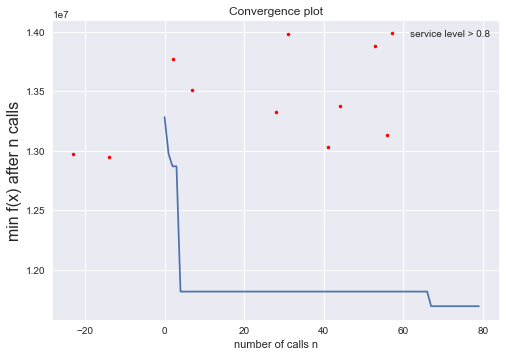

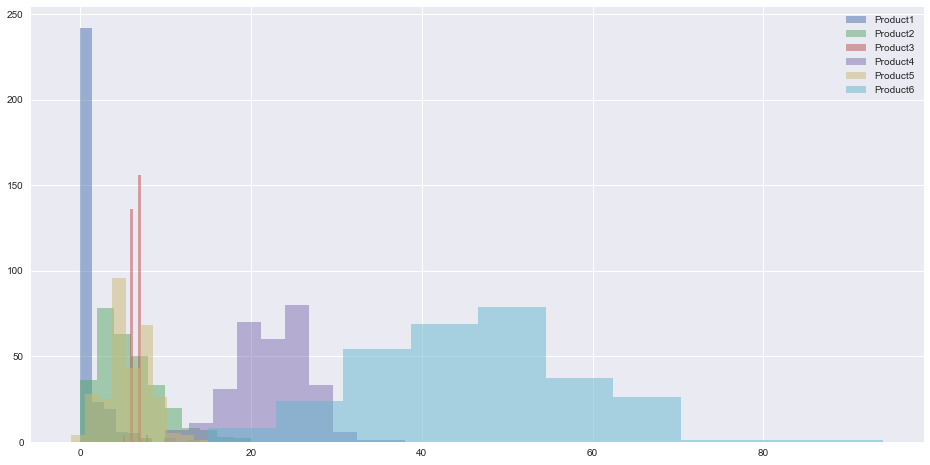

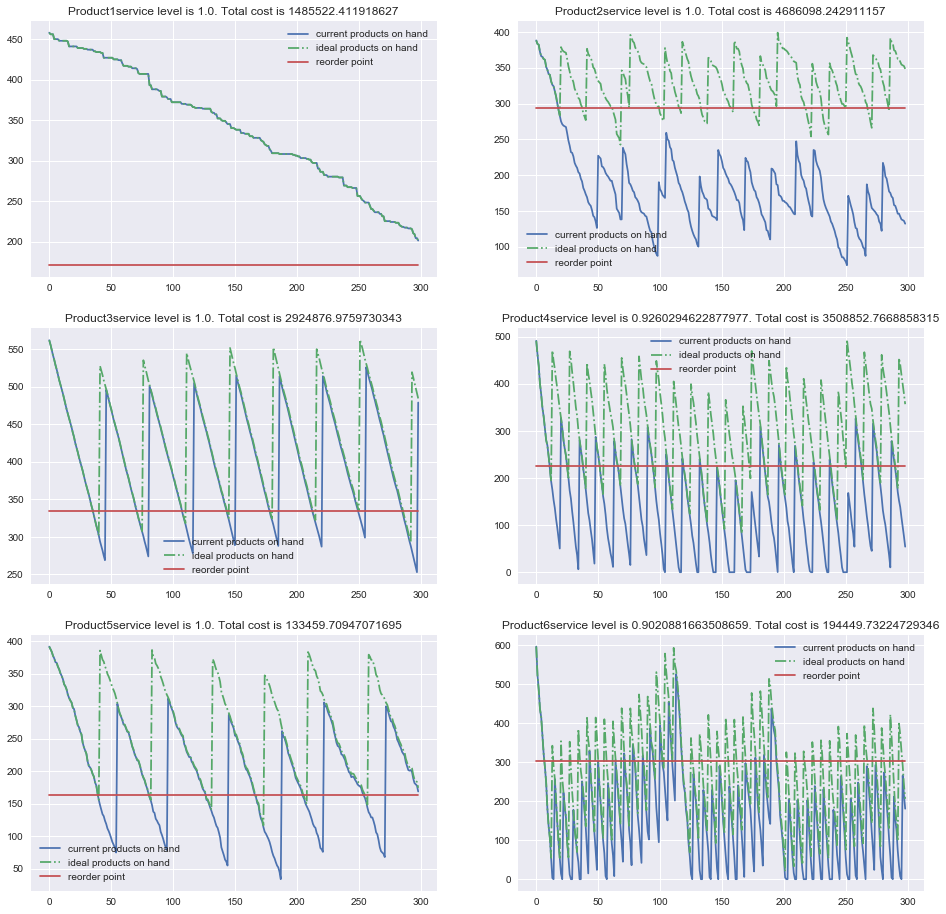

In [5]:
print_result(300, A)